<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex07_Binary_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 07 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [90]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from dfply import *  # handy module to mimic R dplyr library

from helpers import chisq

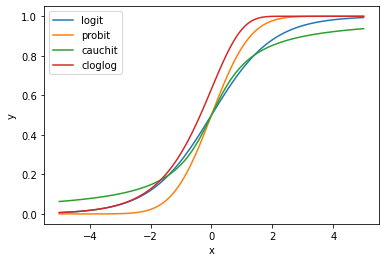

In [19]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
plt.show()


## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [20]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [21]:
titanic_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
155,1.0,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.5000,B69,S,3,NaN,"Montreal, PQ",1
953,3.0,"Leeni, Mr. Fahim ('Philip Zenni')",male,22.0,0.0,0.0,2620,7.2250,None,C,6,NaN,None,1
473,2.0,"Knight, Mr. Robert J",male,NaN,0.0,0.0,239855,0.0000,None,S,None,NaN,Belfast,0
362,2.0,"Cameron, Miss. Clear Annie",female,35.0,0.0,0.0,F.C.C. 13528,21.0000,None,S,14,NaN,"Mamaroneck, NY",1
546,2.0,"Reynaldo, Ms. Encarnacion",female,28.0,0.0,0.0,230434,13.0000,None,S,9,NaN,Spain,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2.0,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,0.0,239853,0.0000,None,S,None,NaN,Belfast,0
1136,3.0,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0.0,0.0,65305,8.1125,None,S,None,NaN,None,0
862,3.0,"Hellstrom, Miss. Hilda Maria",female,22.0,0.0,0.0,7548,8.9625,None,S,C,NaN,None,1
202,1.0,"McGough, Mr. James Robert",male,36.0,0.0,0.0,PC 17473,26.2875,E25,S,7,NaN,"Philadelphia, PA",1


In [22]:
titanic_train.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,1047.000000,1047,1047,836.000000,1047.000000,1047.000000,1047,1046.000000,232,1045,388,91.000000,584,1047
unique,NaN,1046,2,NaN,NaN,NaN,789,NaN,157,3,25,NaN,312,2
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,15,NaN,"New York, NY",0
freq,NaN,2,678,NaN,NaN,NaN,10,NaN,6,729,34,NaN,49,647
mean,2.303725,NaN,NaN,30.069577,0.499522,0.392550,NaN,31.860982,NaN,NaN,NaN,161.516484,NaN,NaN
std,0.836212,NaN,NaN,14.529644,1.040182,0.885221,NaN,48.518676,NaN,NaN,NaN,99.124205,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,77.000000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.400000,NaN,NaN,NaN,156.000000,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,30.392700,NaN,NaN,NaN,255.500000,NaN,NaN


In [23]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,210.000000,262.000000,262.000000,262,262.000000,63,262,98,30.000000,161,262
unique,NaN,262,2,NaN,NaN,NaN,235,NaN,59,3,21,NaN,120,2
top,NaN,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",male,NaN,NaN,NaN,113781,NaN,B58 B60,S,C,NaN,"New York, NY",0
freq,NaN,1,165,NaN,NaN,NaN,4,NaN,2,185,9,NaN,15,162
mean,2.259542,NaN,NaN,29.130952,0.496183,0.354962,NaN,39.022518,NaN,NaN,NaN,158.666667,NaN,NaN
std,0.844979,NaN,NaN,13.950098,1.049532,0.782932,NaN,62.840182,NaN,NaN,NaN,94.845549,NaN,NaN
min,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,4.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,68.500000,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.800000,NaN,NaN,NaN,151.000000,NaN,NaN
75%,3.000000,NaN,NaN,36.000000,1.000000,0.000000,NaN,39.515625,NaN,NaN,NaN,255.500000,NaN,NaN


In [24]:
# Number of NA's
print(titanic_train.isna().sum())
titanic_test.isna().sum()

pclass         0
name           0
sex            0
age          211
sibsp          0
parch          0
ticket         0
fare           1
cabin        815
embarked       2
boat         659
body         956
home.dest    463
survived       0
dtype: int64


pclass         0
name           0
sex            0
age           52
sibsp          0
parch          0
ticket         0
fare           0
cabin        199
embarked       0
boat         164
body         232
home.dest    101
survived       0
dtype: int64

We will modify train dataset for our academic purpose :-)

### Model where all covariates are discrete

for categorical data in pandas see https://pandas.pydata.org/docs/user_guide/categorical.html

In [25]:
data_dis = titanic_train[['survived','pclass','sex','embarked']]

# or use dfply module
#data_dis = titanic_train >> select(titanic_train.survived, titanic_train.pclass, titanic_train.sex,
#                                   titanic_train.embarked)
print(data_dis.dtypes)

# dfply does not have mutate_if func  just mutate :(
data_dis_ = data_dis.apply(lambda x: x.astype('category') if str(data_dis['pclass'].dtype) == 'str' else x)
print(data_dis_.dtypes)

# only pandas
data_dis = data_dis[data_dis.embarked.isin(('C', 'S', 'Q'))]  # filter
data_dis = data_dis.rename(columns = {'pclass':'class_'})  # rename
data_dis = data_dis.astype('category')  # `categorize` 

# pandas pipe functionality
data_dis2=(
     data_dis
    .pipe(lambda df: df['embarked'].isin(('C', 'S', 'Q')))  # filter
    .rename({'pclass':'class_'})  # rename
    .astype('category') # `categorize` 
)

# with pandas + dfply
data_dis3 = data_dis >> \
            filter_by(data_dis.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_dis.survived.astype('category'),
                      class_ = data_dis.pclass.astype('category'),
                      sex = data_dis.sex.astype('category'),
                      embarked = data_dis.embarked.astype('category'))  # `categorize`  & # rename
  
  

print(data_dis.describe(include='all'))
data_dis.dtypes

survived    category
pclass       float64
sex         category
embarked    category
dtype: object
survived    category
pclass       float64
sex         category
embarked    category
dtype: object
       survived  class_   sex embarked
count      1045  1045.0  1045     1045
unique        2     3.0     2        3
top           0     3.0  male        S
freq        647   573.0   678      729


survived    category
class_      category
sex         category
embarked    category
dtype: object

In [26]:
data_dis

,survived,class_,sex,embarked
155,1,1.0,female,S
953,1,3.0,male,C
473,0,2.0,male,S
362,1,2.0,female,S
546,1,2.0,female,S
...,...,...,...,...
384,0,2.0,male,S
1136,0,3.0,female,S
862,1,3.0,female,S
202,1,1.0,male,S


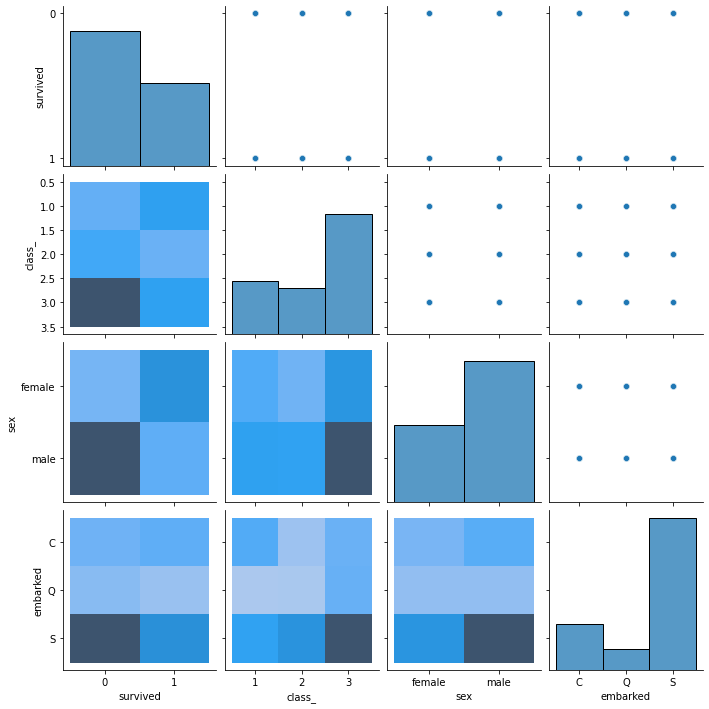

In [27]:
g = sns.pairplot(data=data_dis, vars=['survived', 'class_', 'sex','embarked'])
#g.map_diag(sns.kdeplot)
g.map_lower(sns.histplot)
#g.map_upper(sns.histplot)

In [28]:
pd.crosstab([data_dis.embarked, data_dis.sex, data_dis.survived], [data_dis.class_], margins=True)

class_                    1.0  2.0  3.0   All
embarked sex    survived                     
C        female 0           1    0    9    10
                1          50   10   18    78
         male   0          34   10   45    89
                1          23    4   14    41
Q        female 0           0    0   18    18
                1           2    1   28    31
         male   0           1    5   39    45
                1           0    0    4     4
S        female 0           3    9   62    74
                1          53   59   44   156
         male   0          59  104  248   411
                1          27   17   44    88
All                       253  219  573  1045

In [29]:
print(pd.crosstab([data_dis.survived], [data_dis.class_], margins=True))
print(pd.crosstab([data_dis.survived], [data_dis.class_], normalize='index'))
print(pd.crosstab([data_dis.survived], [data_dis.class_], normalize='columns'))

class_    1.0  2.0  3.0   All
survived                     
0          98  128  421   647
1         155   91  152   398
All       253  219  573  1045
class_         1.0       2.0       3.0
survived                              
0         0.151468  0.197836  0.650696
1         0.389447  0.228643  0.381910
class_         1.0       2.0       3.0
survived                              
0         0.387352  0.584475  0.734729
1         0.612648  0.415525  0.265271


In [30]:
# Count observations
print(pd.crosstab([data_dis.survived], [data_dis.sex], margins=True))
# Conditional proportions given rows
print(pd.crosstab([data_dis.survived], [data_dis.sex], normalize='index'))
# Conditional proportions given columns
print(pd.crosstab([data_dis.survived], [data_dis.sex], normalize='columns'))

sex       female  male   All
survived                    
0            102   545   647
1            265   133   398
All          367   678  1045
sex         female      male
survived                    
0         0.157651  0.842349
1         0.665829  0.334171
sex         female      male
survived                    
0         0.277929  0.803835
1         0.722071  0.196165


In [31]:
print(pd.crosstab([data_dis.survived], [data_dis.embarked], margins=True))
print(pd.crosstab([data_dis.survived], [data_dis.embarked], normalize='columns'))


embarked    C   Q    S   All
survived                    
0          99  63  485   647
1         119  35  244   398
All       218  98  729  1045
embarked         C         Q         S
survived                              
0         0.454128  0.642857  0.665295
1         0.545872  0.357143  0.334705


In [32]:
table_sex = pd.crosstab([data_dis.survived], [data_dis.sex], margins=True)
table_sex.iloc[0, 0]
table_sex

sex,female,male,All
survived,,,
0,102,545,647
1,265,133,398
All,367,678,1045


In [33]:
# Odss ratio (empirický poměr šancí)
def OR(df):
    return df.iloc[0, 0] / df.iloc[0, 1] / (df.iloc[1, 0] / df.iloc[1, 1])

table_sex = pd.crosstab([data_dis.survived], [data_dis.sex], margins=True)
print(table_sex)
print(f'Odds ratio: {OR(table_sex)}')
# Men have 

sex       female  male   All
survived                    
0            102   545   647
1            265   133   398
All          367   678  1045
Odds ratio: 0.09393110611043795


In [34]:
#install.packages("epitools")
#library(epitools)
#oddsratio.wald(table_sex, conf.level = 0.95)

#/TODO for python/

In [35]:

c, p, dof, expected = scipy.stats.chi2_contingency(table_sex)
print(f'Statistic: {c} \n'
      f'Deg of freedom: {dof} \n'
      f'p value: {p}')

Statistic: 279.2803460565639 
Deg of freedom: 4 
p value: 3.185317985795631e-59


### Null model

* Compute the null model (assume that the probability of survival was the same for all passangers)

* How do we interpret estimated parameter?

## Note
endog (dependent var)for Binomial family in statsmodels can be specified in one of three ways: A 1d array of 0 or 1 values, indicating failure or success respectively. A 2d array, with two columns. The first column represents the success count and the second column represents the failure count. A 1d array of proportions, indicating the proportion of successes, with parameter var_weights containing the number of trials for each row.

In [36]:
# dependet variable in our case `survived` must be casted to float/int as required in statsmodels documentation
# for Binomial family https://www.statsmodels.org/dev/generated/statsmodels.genmod.families.family.Binomial.html#statsmodels.genmod.families.family.Binomial


data_dis['survived'] = data_dis['survived'].astype('float')

mod0=smf.glm(formula = 'survived~1', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1044
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -694.39
Date:                Mon, 05 Sep 2022   Deviance:                       1388.8
Time:                        12:39:40   Pearson chi2:                 1.04e+03
No. Iterations:                     4   Pseudo R-squ. (CS):         -4.441e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4859      0.064     -7.627      0.000      -0.611      -0.361
==============================================================================
"""

In [37]:
# The chances of survival according to training data.
print(np.exp(mod0.params[0]))

# The probability of survival.
print(np.exp(mod0.params[0])/(1+np.exp(mod0.params[0])))


0.6151468315301413
0.38086124401913957


In [38]:
mod0.params[0]

-0.4858942892164594

### Model with variable: sex

* Compute the model with one covariate sex. 

* How can we interpret estiamted coefficients? 

* Did survival depend on gender (`sex`) ?

* Perform an appropriate tests.

* Did women have a better chance of survival? 


In [39]:
mod_sex=smf.glm(formula = 'survived~sex', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -552.53
Date:                Mon, 05 Sep 2022   Deviance:                       1105.1
Time:                        12:39:40   Pearson chi2:                 1.04e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2378
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9548      0.117      8.194      0.000       0.726       1.183
sex[T.male]    -2.3652      0.151    -15.619      0.000      -2.662      -2.068
===============================================================================
"""

Use deviance to test submodels `anova(model_1,model_2,test="Chisq")`.

In [40]:
# The chances of survival according to training data.
print(np.exp(mod_sex.params))
#sexmale:    0.08419973147842043
#anova(mod_sex,mod0,test="Chisq")

chisq(mod0, mod_sex)


Intercept      2.598039
sex[T.male]    0.093931
dtype: float64
Estimated Chi2 statistic is: 283.71324935652797 
P-value is: nan 



In [41]:
np.array(mod_sex.params.index)

array(['Intercept', 'sex[T.male]'], dtype=object)

In [42]:
mod_sex.cov_params().to_numpy()

array([[ 0.01357749, -0.01357749],
       [-0.01357749,  0.02293114]])

In [43]:
#Function to estimate OR with lower and upper limit of 95% CI for OR

def OR_coef(variable,model,CI):
    param = np.array(model.params)
    where = np.where(np.array(model.params.index) == variable)
    beta = param[where]
    se = np.sqrt(np.diag(model.cov_params().to_numpy()))[where]
    or_ = np.exp(beta)
    
    return pd.DataFrame(index=[variable], data={'OR': or_, 'LCL': np.exp(beta-1*scipy.stats.norm.ppf(CI/2 +0.5)*se)
                                              , 'UCL':np.exp(beta+ scipy.stats.norm.ppf(CI/2 +0.5)*se)})
OR_coef("sex[T.male]",mod_sex,0.95)

,OR,LCL,UCL
sex[T.male],0.093931,0.069809,0.126388


Compare with results obtained from contingency table.

### Your turn:

Estimate model with one covariate `class` and compute: 

1. Did survival depend on (`class`) ?

2. Perform an appropriate tests.

3. Compute odds ratios between classes.

4. Did passangers in second class have a better chance of survival than in third? 


In [44]:
#1. 

In [45]:
#2. 

In [46]:
#3.

In [47]:
#4.

### Model with all discrete covariates without interactions

In [48]:
# Simple Logistic Regression model with all discrete covariates without interactions

# to work with factor in statsmodels we need to first one-hot encode variables
one_hot = pd.get_dummies(data_dis.iloc[:, data_dis.columns != 'survived'],
                         columns=list(np.array(data_dis.columns)[data_dis.columns != 'survived']),
                    drop_first=True)
one_hot = sm.add_constant(one_hot) # add intercept
mod1=sm.GLM(endog=data_dis.survived, exog=one_hot,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1039
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -504.92
Date:                Mon, 05 Sep 2022   Deviance:                       1009.8
Time:                        12:39:40   Pearson chi2:                 1.06e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3041
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4866      0.234     10.619      0.000       2.028       2.946
class__2.0    -0.6960      0.230     -3.033      0.002      -1.146      -0.246
class__3.0    -1.5148      0.200     -7.588      0.000      -1.906      -1.124
sex_male      -2.4878      0.166    -14.981      0.000      -2.813      -2.162
embarked_Q    -0.6469      0.315     -2.052      0.040      -1.265      -0.029
embarked_S    -0.6658      0.198     -3.355      0.001      -1.055      -0.277
==============================================================================
"""

Deviance tests to add/drop independent variables.

/NOT IMPLEMENTED YET FOR PYTHON/ 

`drop1(model,test="Chisq")`

`add1(model,terms.to.add,test="Chisq")`

In [49]:
drop1(mod1,test="Chisq")


NameError: name 'drop1' is not defined

In [ ]:
add1(mod0,survived~sex+class+embarked, test="Chisq")


In [50]:
data_dis2 = data_dis.replace({'embarked': 'Q'}, 'C')

one_hot2 = pd.get_dummies(data_dis2.iloc[:, data_dis2.columns != 'survived'],
                         columns=list(np.array(data_dis2.columns)[data_dis2.columns != 'survived']),
                    drop_first=True)
one_hot2 = sm.add_constant(one_hot2) # add intercept

mod1=sm.GLM(endog=data_dis2.survived, exog=one_hot2,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1040
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -507.05
Date:                Mon, 05 Sep 2022   Deviance:                       1014.1
Time:                        12:39:49   Pearson chi2:                 1.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3013
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3254      0.218     10.690      0.000       1.899       2.752
class__2.0    -0.7595      0.226     -3.361      0.001      -1.202      -0.317
class__3.0    -1.6308      0.192     -8.509      0.000      -2.006      -1.255
sex_male      -2.4452      0.164    -14.955      0.000      -2.766      -2.125
embarked_S    -0.4565      0.171     -2.675      0.007      -0.791      -0.122
==============================================================================
"""

In [ ]:
#mod1=glm(survived~relevel(factor(sex),ref="male")+class+embarked,family=binomial(link = "logit"),data_dis2) 
#summary(mod1)



In [51]:
OR_coef("sex_male",mod1,0.95)

,OR,LCL,UCL
sex_male,0.086705,0.062932,0.119459


Interpret previous result:

* By how many percentage is the chance of survival lower for  men? 

* Interpret confidence intrval and its significance.


Lets try model with second order interactions.


In [ ]:
add1(mod1,~.^2,test="Chisq")

In [52]:

mod2_all=smf.glm(formula = 'survived~sex*embarked + sex*class_+class_*embarked', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2_all.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1031
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.83
Date:                Mon, 05 Sep 2022   Deviance:                       965.66
Time:                        12:39:54   Pearson chi2:                 1.04e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3330
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.8977      0.665      5.863      0.000       2.595       5.201
sex[T.male]                    -4.2875      0.656     -6.538      0.000      -5.573      -3.002
embarked[T.Q]                  -0.9437      2.410     -0.392      0.695      -5.667       3.780
embarked[T.S]                  -0.9854      0.574     -1.718      0.086      -2.110       0.139
class_[T.2.0]                  -0.3531      0.897     -0.393      0.694      -2.112       1.406
class_[T.3.0]                  -3.1550      0.644     -4.898      0.000      -4.417      -1.892
sex[T.male]:embarked[T.Q]      -0.8737      0.762     -1.147      0.251      -2.367       0.619
sex[T.male]:embarked[T.S]       0.5874      0.504      1.165      0.244      -0.400       1.575
sex[T.male]:class_[T.2.0]      -0.0771      0.709     -0.109      0.913      -1.466       1.312
sex[T.male]:class_[T.3.0]       2.3494      0.592      3.969      0.000       1.189       3.510
class_[T.2.0]:embarked[T.Q]    -0.8516      3.102     -0.275      0.784      -6.931       5.228
class_[T.3.0]:embarked[T.Q]     0.6655      2.397      0.278      0.781      -4.032       5.363
class_[T.2.0]:embarked[T.S]    -0.6229      0.695     -0.896      0.370      -1.985       0.740
class_[T.3.0]:embarked[T.S]    -0.1214      0.462     -0.263      0.793      -1.027       0.784
===============================================================================================
"""

In [ ]:
step(mod2_all)

In [53]:
mod2=smf.glm(formula = 'survived~sex*embarked + sex*class_', data=data_dis,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1035
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -483.43
Date:                Mon, 05 Sep 2022   Deviance:                       966.86
Time:                        12:39:58   Pearson chi2:                 1.04e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3322
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.9838      0.600      6.642      0.000       2.808       5.159
sex[T.male]                  -4.3008      0.639     -6.729      0.000      -5.553      -3.048
embarked[T.Q]                -0.3050      0.484     -0.630      0.529      -1.254       0.644
embarked[T.S]                -1.1187      0.413     -2.711      0.007      -1.927      -0.310
class_[T.2.0]                -0.9185      0.628     -1.463      0.143      -2.149       0.312
class_[T.3.0]                -3.2270      0.542     -5.959      0.000      -4.288      -2.166
sex[T.male]:embarked[T.Q]    -0.9528      0.746     -1.277      0.202      -2.415       0.510
sex[T.male]:embarked[T.S]     0.5889      0.474      1.241      0.215      -0.341       1.519
sex[T.male]:class_[T.2.0]    -0.0121      0.697     -0.017      0.986      -1.379       1.355
sex[T.male]:class_[T.3.0]     2.3630      0.589      4.010      0.000       1.208       3.518
=============================================================================================
"""

In [91]:
#anova(mod2_all,mod2,test="Chisq")
chisq(mod2, mod2_all)

Estimated Chi2 statistic is: 22.661258538224274 
P-value is: nan 



Interpretation by OR in models with interactions is more complitacated, see Lecture notes.

Lets try model with merged factor levels.




In [55]:
data_dis3 = data_dis2.replace({'class_': 2}, 1)

data_dis3.class_.unique()

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[1.0, 3.0]
Categories (2, float64): [1.0, 3.0]

In [56]:
mod2=smf.glm(formula = 'survived~sex*embarked + sex*class_', data=data_dis3,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

mod2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1039
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -494.16
Date:                Mon, 05 Sep 2022   Deviance:                       988.32
Time:                        12:40:13   Pearson chi2:                 1.03e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3183
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.3410      0.375      8.904      0.000       2.606       4.076
sex[T.male]                  -4.1233      0.425     -9.705      0.000      -4.956      -3.291
embarked[T.S]                -0.9926      0.291     -3.414      0.001      -1.562      -0.423
class_[T.3.0]                -2.7377      0.333     -8.210      0.000      -3.391      -2.084
sex[T.male]:embarked[T.S]     0.5453      0.359      1.520      0.128      -0.158       1.248
sex[T.male]:class_[T.3.0]     2.1601      0.387      5.589      0.000       1.403       2.918
=============================================================================================
"""

In [89]:
mod3=smf.glm(formula = 'survived~sex*embarked + sex*class_+class_*embarked', data=data_dis3,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod3.summary())



#anova(mod2,mod3,test="Chisq")
chisq(mod2, mod3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                 1045
Model:                            GLM   Df Residuals:                     1038
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -493.00
Date:                Mon, 05 Sep 2022   Deviance:                       986.01
Time:                        12:51:43   Pearson chi2:                 1.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3198
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Model with continuous independent variable.


Discuss difference from models without continuous variable (again)!!!

In [92]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 155 to 1105
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1047 non-null   float64 
 1   name       1047 non-null   object  
 2   sex        1047 non-null   category
 3   age        836 non-null    float64 
 4   sibsp      1047 non-null   float64 
 5   parch      1047 non-null   float64 
 6   ticket     1047 non-null   object  
 7   fare       1046 non-null   float64 
 8   cabin      232 non-null    object  
 9   embarked   1045 non-null   category
 10  boat       388 non-null    object  
 11  body       91 non-null     float64 
 12  home.dest  584 non-null    object  
 13  survived   1047 non-null   category
dtypes: category(3), float64(6), object(5)
memory usage: 101.6+ KB


In [104]:
       
data_con = titanic_train >> \
                select(titanic_train.survived, titanic_train.sex, titanic_train.embarked, titanic_train.fare,
                      titanic_train.pclass, titanic_train.age)

data_con = data_con.apply(lambda x: x.astype('category') if str(x.dtype) in ('object', 'str') else x) 

print(data_con.describe(include='all'))
print(data_con.info())

    
data_con = data_con >> \
            filter_by(data_con.embarked.isin(('C', 'S', 'Q')) )  >> \
            transmute(survived = data_con.survived.astype('float'), # cast to float beacause of statsmodels requirements
                      age = data_con.age,
                      fare = data_con.fare,
                      class_ = data_con.pclass.astype('category'),
                      sex = data_con.sex.astype('category'),
                      embarked = data_con.embarked.astype('category'))

data_con = data_con.dropna(axis=0, how='any')

print(data_con.describe(include='all'))          
data_con.info()

       survived   sex embarked         fare       pclass         age
count      1047  1047     1045  1046.000000  1047.000000  836.000000
unique        2     2        3          NaN          NaN         NaN
top           0  male        S          NaN          NaN         NaN
freq        647   678      729          NaN          NaN         NaN
mean        NaN   NaN      NaN    31.860982     2.303725   30.069577
std         NaN   NaN      NaN    48.518676     0.836212   14.529644
min         NaN   NaN      NaN     0.000000     1.000000    0.166700
25%         NaN   NaN      NaN     7.895800     2.000000   21.000000
50%         NaN   NaN      NaN    14.400000     3.000000   28.000000
75%         NaN   NaN      NaN    30.392700     3.000000   39.000000
max         NaN   NaN      NaN   512.329200     3.000000   76.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 155 to 1105
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    ---------

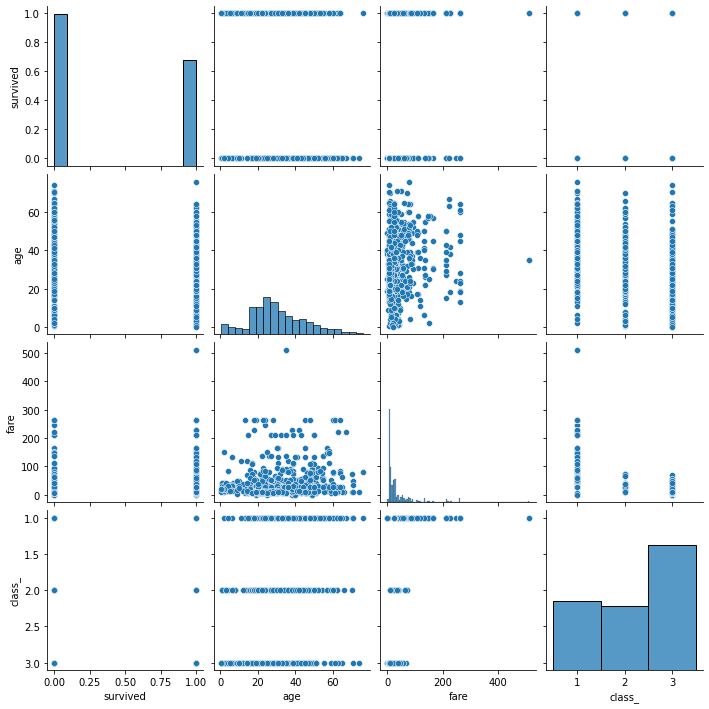

In [115]:
g = sns.pairplot(data=data_con, vars=['survived', 'age','fare','class_'])
#g.map_diag(sns.histplot)
#g.map_lower(sns.histplot)
#g.map_upper(sns.boxplot)

# TODO It needs define own functionality based on PairGrid which will distinguish categorical vs categorical
# categorical vs quantitative and quantitaive vs quantitative variables

Text(0.5, 1.0, 'Gender boxplot')

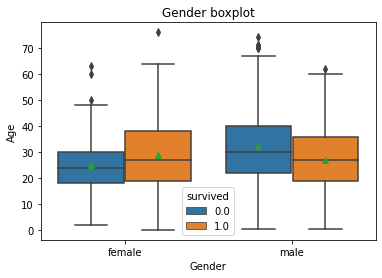

In [118]:
fig, ax = plt.subplots()
sns.boxplot(x='sex', y='age', hue='survived', ax = ax, data=data_con, showmeans=True)
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_title('Gender boxplot')

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/media/emanuel/data/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Class x Fare')

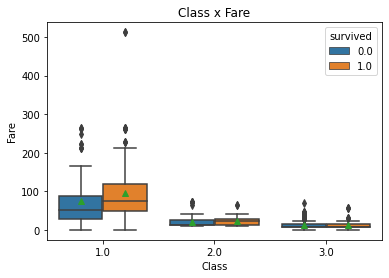

In [123]:
fig, ax = plt.subplots()
sns.boxplot(x='class_', y='fare', hue='survived', ax = ax, data=data_con, showmeans=True)
ax.set_xlabel('Class')
ax.set_ylabel('Fare')
ax.set_title('Class x Fare')

Continuous variable as factor

In [127]:
data_con_fac = data_con >> \
  mutate(age = pd.cut(data_con.age,(-np.inf, 15, 50, np.inf), labels=["child","adult","senior"]))
data_con_fac

,survived,age,fare,class_,sex,embarked
155,1.0,senior,93.5000,1.0,female,S
953,1.0,adult,7.2250,3.0,male,C
362,1.0,adult,21.0000,2.0,female,S
546,1.0,adult,13.0000,2.0,female,S
821,0.0,adult,20.5250,3.0,male,S
...,...,...,...,...,...,...
83,1.0,senior,26.5500,1.0,female,S
742,1.0,adult,8.0500,3.0,male,S
862,1.0,adult,8.9625,3.0,female,S
202,1.0,adult,26.2875,1.0,male,S


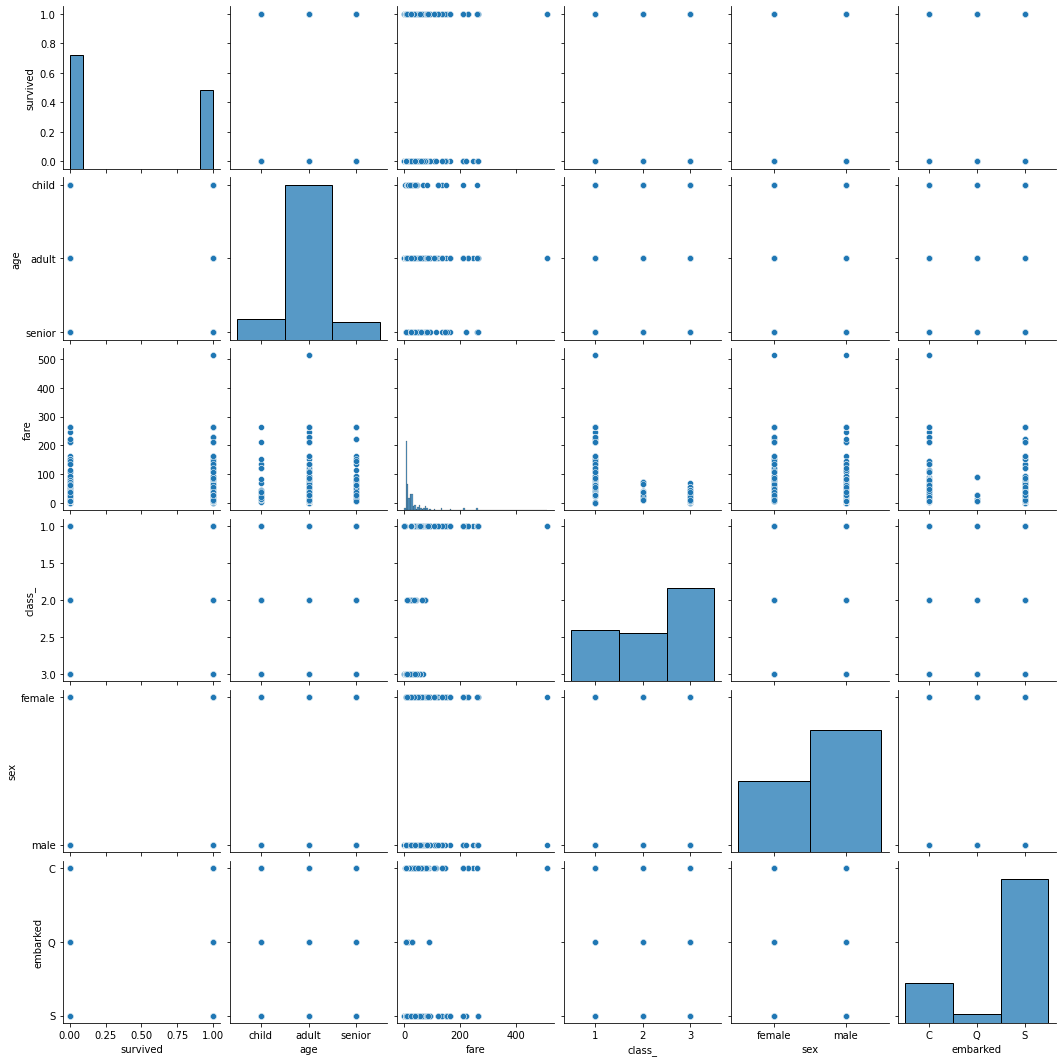

In [128]:
g = sns.pairplot(data=data_con_fac, vars=list(data_con_fac.columns))  # TODO needs custom implementation


In [129]:

mod_0= smf.glm(formula = 'survived~1', data=data_con_fac,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_0.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  833
Model:                            GLM   Df Residuals:                      832
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -563.99
Date:                Mon, 05 Sep 2022   Deviance:                       1128.0
Time:                        18:26:43   Pearson chi2:                     833.
No. Iterations:                     4   Pseudo R-squ. (CS):         -4.441e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3616      0.070     -5.135      0.0

In [130]:

mod_age_fac = smf.glm(formula = 'survived~age', data=data_con_fac,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()

print(mod_age_fac.summary())

np.exp(mod_age_fac.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  833
Model:                            GLM   Df Residuals:                      830
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -555.26
Date:                Mon, 05 Sep 2022   Deviance:                       1110.5
Time:                        18:27:10   Pearson chi2:                     833.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02075
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4520      0.216      2.090

Intercept        1.571429
age[T.adult]     0.410658
age[T.senior]    0.318182
dtype: float64

Is the chance decreasing with increasing age?

In [131]:
#anova(mod_age_fac,mod_0,test="Chisq")

chisq(mod_0, mod_age_fac)

Estimated Chi2 statistic is: 17.467804703542697 
P-value is: nan 



In [136]:

mod_age = smf.glm(formula = 'survived~np.divide(age, 10)', data=data_con,
                family=sm.families.Binomial(sm.families.links.Logit())).fit()
print(mod_age.summary())
np.exp(mod_age.params)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  833
Model:                            GLM   Df Residuals:                      831
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -559.86
Date:                Mon, 05 Sep 2022   Deviance:                       1119.7
Time:                        18:36:40   Pearson chi2:                     833.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009878
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0595      0

Intercept             1.061356
np.divide(age, 10)    0.867805
dtype: float64

Question:

* With increasing age by 10 years, chance to survive decreased by 11%. 

* What do you think about causality in this result?

In [137]:
#anova(mod_age,mod_0,test="Chisq")
chisq(mod_0, mod_age)

Estimated Chi2 statistic is: 8.2689157424918 
P-value is: nan 



Question:

* Can we compare by deviance test models `mod_age` and `mod_age_fac`?
* Which model do you prefere and why?
* For which approach (factorized or continuous) saturated model is useful and why?


In [140]:

#mod_sat_fac = smf.glm(formula = 'survived~sex*age*embarked*class_', data=data_con >> \
#                          mutate(age=data_con.age.astype('category'),
#                                 fare=data_con.fare.astype('category')),
#                family=sm.families.Binomial(sm.families.links.Logit())).fit()
#mod_sat_fac.summary()

/media/emanuel/data/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/media/emanuel/data/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/media/emanuel/data/miniconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                  833
Model:                            GLM   Df Residuals:                      422
Model Family:                Binomial   Df Model:                          410
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Sep 2022   Deviance:                       9947.2
Time:                        18:41:19   Pearson chi2:                 4.86e+17
No. Iterations:                    26   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                4.7e+15   1.64e+07   2.86e+08      0.000     4.7e+15     4.7e+15
sex[T.male]                                           -3.989e+15   1.56e+07  -2.56e+08      0.000   -3.99e+15   -3.99e+15
age[T.0.3333]                                         -7.456e+14   1.04e+07  -7.14e+07      0.000   -7.46e+14   -7.46e+14
age[T.0.4167]                                          1.396e+15   1.78e+07   7.83e+07      0.000     1.4e+15     1.4e+15
age[T.0.6667]                                          6.416e+14   8.71e+06   7.37e+07      0.000    6.42e+14    6.42e+14
age[T.0.75]                                            8.675e+14   2.94e+07   2.95e+07      0.000    8.67e+14    8.67e+14
age[T.0.8333]                                            6.5e+14   6.46e+06   1.01e+08      0.000     6.5e+14     6.5e+14
age[T.0.9167]                                          2.848e+13   1.79e+07   1.59e+06      0.000    2.85e+13    2.85e+13
age[T.1.0]                                            -7.005e+14   3.35e+07  -2.09e+07      0.000      -7e+14      -7e+14
age[T.2.0]                                            -4.613e+15   3.61e+07  -1.28e+08      0.000   -4.61e+15   -4.61e+15
age[T.3.0]                                            -2.046e+15    3.5e+07  -5.85e+07      0.000   -2.05e+15   -2.05e+15
age[T.4.0]                                             1.773e+15   3.92e+07   4.53e+07      0.000    1.77e+15    1.77e+15
age[T.5.0]                                             9.337e+14   3.68e+07   2.54e+07      0.000    9.34e+14    9.34e+14
age[T.6.0]                                            -2.193e+14   3.72e+07  -5.89e+06      0.000   -2.19e+14   -2.19e+14
age[T.7.0]                                             1.751e+15   2.37e+07   7.39e+07      0.000    1.75e+15    1.75e+15
age[T.8.0]                                            -1.496e+15   2.06e+07  -7.25e+07      0.000    -1.5e+15    -1.5e+15
age[T.9.0]                                            -2.593e+14    2.9e+07  -8.96e+06      0.000   -2.59e+14   -2.59e+14
age[T.10.0]                                           -2.045e+15   1.95e+07  -1.05e+08      0.000   -2.04e+15   -2.04e+15
age[T.11.0]                                           -1.138e+15      2e+07  -5.69e+07      0.000   -1.14e+15   -1.14e+15
age[T.11.5]                                            -7.72e+14   1.04e+07  -7.39e+07      0.000   -7.72e+14   -7.72e+14
age[T.12.0]                                            1.104e+15   2.13e+07   5.18e+07      0.000     1.1e+15     1.1e+15
age[T.13.0]                                            3.401e+14   3.29e+07   1.04e+07      0.000     3.4e+14     3.4e+14
age[T.14.0]                      

Your turn:

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `child`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare`, where each level break is by 10 pounds.
* Estimate a model, where the chance of survival depends on factorized `fare` and `sex` and `child`.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

Next Exercises (8 and 9):

* Logistic regression and binary classification (ROC, accuracy, ...)
* Residual analysis
* Prediction and confidence intervals
* Logistic regression and ML approach

